In [52]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_community.document_loaders import CSVLoader
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain_community.vectorstores import Chroma

import numpy as np
from typing import List

In [53]:
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")

In [54]:
loader = CSVLoader(file_path="/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv")
docs = loader.load()

print(len(docs))
print(docs[0])

157
page_content='Timestamp: 09/07/2025 17:42:47
NAME: Dhruta
Task Assigned: CNN
Status: completed
Time Taken: 3hr' metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 0}


In [55]:
print(docs)

[Document(metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 0}, page_content='Timestamp: 09/07/2025 17:42:47\nNAME: Dhruta\nTask Assigned: CNN\nStatus: completed\nTime Taken: 3hr'), Document(metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 1}, page_content='Timestamp: 09/07/2025 17:49:46\nNAME: Dhruta\nTask Assigned: Heartbeat sync game development and the empathic dialogue Companion Early Adulthood\nStatus: completed\nTime Taken: 5hr'), Document(metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 2}, page_content='Timestamp: 09/07/2025 17:51:06\nNAME: Ashwani\nTask Assigned: Web\nStatus: Done\nTime Taken: None'), Document(metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 3}, page_content='Timestamp: 10/07/2025 00:43:45\nNAME: Dhrutabrata Biswal\nTask Assigned: make. a CNN architecture that would great and truely appreciated\nStatus:

In [56]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
embeddings

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x11dcb1e00>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x11dcb3a80>, model='text-embedding-3-small', dimensions=None, deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [57]:
from langchain_community.vectorstores import FAISS
vectorstore = FAISS.from_documents(docs,embeddings)
print(f"total number of docs {vectorstore.index.ntotal}")

total number of docs 157


In [58]:
print(vectorstore)

In [59]:
retriver = vectorstore.as_retriever()
retriver.invoke("who is dhruta")

[Document(id='7db67cf7-68c3-4b4d-8f48-f26142ddebdb', metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 0}, page_content='Timestamp: 09/07/2025 17:42:47\nNAME: Dhruta\nTask Assigned: CNN\nStatus: completed\nTime Taken: 3hr'),
 Document(id='c0f93b00-8f70-457f-8c1a-77c39ca6d9d1', metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 4}, page_content='Timestamp: 10/07/2025 10:37:44\nNAME: Dhrutabrata\nTask Assigned: cnn\nStatus: completed\nTime Taken: 2hr'),
 Document(id='71013813-d3d6-4890-b432-7b1f64a44d1e', metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 1}, page_content='Timestamp: 09/07/2025 17:49:46\nNAME: Dhruta\nTask Assigned: Heartbeat sync game development and the empathic dialogue Companion Early Adulthood\nStatus: completed\nTime Taken: 5hr'),
 Document(id='c8b9242c-259f-4c4e-a973-8957b9e8249b', metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nir

In [60]:
query = "do u know who is dhruta"
similar_doc = vectorstore.similarity_search(query,k=3)
for doc in similar_doc:
    print(doc)

page_content='Timestamp: 09/07/2025 17:42:47
NAME: Dhruta
Task Assigned: CNN
Status: completed
Time Taken: 3hr' metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 0}
page_content='Timestamp: 10/07/2025 10:37:44
NAME: Dhrutabrata
Task Assigned: cnn
Status: completed
Time Taken: 2hr' metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 4}
page_content='Timestamp: 09/07/2025 17:49:46
NAME: Dhruta
Task Assigned: Heartbeat sync game development and the empathic dialogue Companion Early Adulthood
Status: completed
Time Taken: 5hr' metadata={'source': '/Users/dhrutamacm2/Desktop/rag_learn/own/data_nirveonx.csv', 'row': 1}


In [61]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.5,
    max_completion_tokens=100,
)
result = llm.invoke("how many day dhruta works")
print(result)

content="I'm sorry, but I don't have any specific information about an individual named Dhruta or their work schedule. Could you provide more context or details?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 14, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-C8rdMIdwSV3oqWcsQF2xNaOPuuXLr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--d03e727c-7fe5-4a57-ab65-5a7b48262710-0' usage_metadata={'input_tokens': 14, 'output_tokens': 30, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [62]:
from typing import TypedDict
from typing_extensions import Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import BaseMessage

In [63]:
from pydantic import BaseModel
from langchain.schema import Document
class RAGState(BaseModel):
    question:str
    retrieved_docs: List[Document] = []
    answer:str =""


In [64]:
def retrieve_docs(state: RAGState) -> RAGState:
    docs = retriver.invoke(state.question)
    return RAGState(question=state.question, retrieved_docs=docs)

def generate_answer(state: RAGState) -> RAGState:
    
    context = "\n\n".join([doc.page_content for doc in state.retrieved_docs])
    prompt = f"Answer the question based on the context.\n\nContext:\n{context}\n\nQuestion: {state.question}"
    response = llm.invoke(prompt)
    return RAGState(question=state.question, retrieved_docs=state.retrieved_docs, answer=response.content)

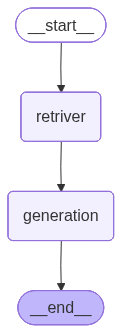

In [65]:
from IPython.display import Image,display
graph = StateGraph(RAGState)

graph.add_node("retriver",retrieve_docs)
graph.add_node("generation",generate_answer)

graph.set_entry_point("retriver")
graph.add_edge("retriver","generation")
graph.add_edge("generation",END)

builder = graph.compile()
builder

In [70]:
if __name__ == "__main__":
    user_question = "what is the capital id delhi"
    initial_state = RAGState(question=user_question)
    final_state = builder.invoke(initial_state)

    print("\n✅ Final Answer:\n", final_state['answer'])


✅ Final Answer:
 The context provided does not contain information about the capital of Delhi. However, the capital of Delhi is New Delhi.
